In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
import random
import numpy as np

def eps_greedy(Q0, N0, Ea, p_eps, max_iters):
    Qa, N, Rt, iters = np.copy(Q0), np.copy(N0), [], 0
    Rc = 0
    while iters < max_iters:
        if np.random.uniform(0, 1) > p_eps:
            ind = np.argmax(Qa)
        else:
            ind = np.random.randint(0, Qa.shape[0])
        R = np.random.normal(Ea[ind], 1)
        N[ind] += 1
        Qa[ind] += (R-Qa[ind]) / N[ind]
        iters += 1
        Rc += R
        Rt.append(Rc / iters)
    return Rt

def UBC_eps_greedy(Q0, N0, Ea, p_eps, max_iters):
    Qa, N, Rt, iters = np.copy(Q0), np.copy(N0), [], 0
    Rc = 0
    while iters < max_iters:
        if np.any(N == 0):
            ind = np.where(N == 0)[0][0]
        elif np.random.uniform(0, 1) > p_eps:
            ind = np.argmax(Qa + 3 * np.sqrt(np.log(iters)/ N))
        else:
            ind = np.random.randint(0, Qa.shape[0])
        
        R = np.random.normal(Ea[ind], 1)
        N[ind] += 1
        Qa[ind] += (R-Qa[ind]) / N[ind]
        iters += 1
        Rc += R
        Rt.append(Rc / iters)
    return Rt

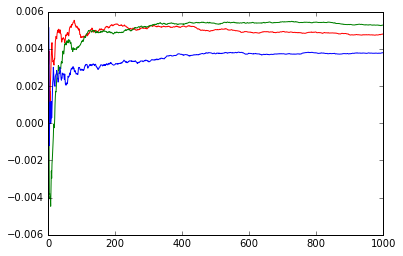

In [5]:
#Ea = [-0.5, 1.0, -0.7, 0.3, -0.3, -0.1, -0.6, 1.5, -1.2, -.3]
Ea = np.random.normal(0, 1, 10)
random.shuffle(Ea)

Q0 = np.array([5 for i in range(len(Ea))]).astype('float')
N0 = np.array([0 for i in range(len(Ea))]).astype('float')

p_eps = [0.1, 0.01, 0.0]

colors  = 'rgb'
for i in range(3):
    Rts = np.zeros((1000, 200))
    for repeats in range(1):
        Rts[:, repeats] = np.array(eps_greedy(Q0, N0, Ea, p_eps[i], 1000))
    plt.plot(np.mean(Rts, axis = 1), color = colors[i])
plt.show()

In [61]:
np.where(np.array([0,1,0]) == 0)[0][0]

0